In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from scipy import stats
import statsmodels.formula.api as smf
import statsmodels.api as sm

In [2]:
df_proband = pd.read_csv("aau1043_dnm.tsv")
df_proband

,Chr,Pos,Ref,Alt,Proband_id,Phase_combined,Crossover,Sanger
0,chr1,241097646,C,T,99379,father,paternal_crossover,confirmed
1,chr10,29202943,A,G,8147,father,maternal_crossover,PCR failed
2,chr11,129441657,C,T,5410,mother,maternal_crossover,confirmed
3,chr13,96867147,A,G,46025,father,paternal_crossover,confirmed
4,chr17,50609998,C,T,144769,mother,maternal_crossover,confirmed
...,...,...,...,...,...,...,...,...
26426,chr9,137374330,C,T,54383,father,NaN,NaN
26427,chr9,137396508,C,T,39729,father,NaN,NaN
26428,chr9,137633973,C,A,17904,mother,NaN,NaN
26429,chr9,137889777,G,A,80108,father,NaN,NaN


In [3]:
df_proband.dtypes

Chr               object
Pos                int64
Ref               object
Alt               object
Proband_id         int64
Phase_combined    object
Crossover         object
Sanger            object
dtype: object

In [4]:
df_parents = pd.read_csv("parental_age.tsv")
df_parents

,Proband_id,Father_age,Mother_age
0,675,31,36
1,1097,19,19
2,1230,30,28
3,1481,32,20
4,1806,38,34
...,...,...,...
391,153657,27,23
392,154565,36,30
393,154621,19,18
394,154810,32,28


In [5]:
# df_parents = df_parents.dtypes

In [6]:
df_total = df_proband['Proband_id'].value_counts()

In [7]:
df_father = df_proband.loc[:, "Phase_combined"] == "father"
df_father = df_proband.loc[df_father, :]
df_father        

,Chr,Pos,Ref,Alt,Proband_id,Phase_combined,Crossover,Sanger
0,chr1,241097646,C,T,99379,father,paternal_crossover,confirmed
1,chr10,29202943,A,G,8147,father,maternal_crossover,PCR failed
3,chr13,96867147,A,G,46025,father,paternal_crossover,confirmed
6,chr2,8091216,C,T,24464,father,paternal_crossover,confirmed
9,chr20,54477057,G,A,5494,father,paternal_crossover,confirmed
...,...,...,...,...,...,...,...,...
26425,chr9,137267012,T,C,96471,father,NaN,NaN
26426,chr9,137374330,C,T,54383,father,NaN,NaN
26427,chr9,137396508,C,T,39729,father,NaN,NaN
26429,chr9,137889777,G,A,80108,father,NaN,NaN


In [8]:
df_mother = df_proband.loc[:, "Phase_combined"] == "mother"


df_mother = df_proband.loc[df_mother, :]
df_mother

,Chr,Pos,Ref,Alt,Proband_id,Phase_combined,Crossover,Sanger
2,chr11,129441657,C,T,5410,mother,maternal_crossover,confirmed
4,chr17,50609998,C,T,144769,mother,maternal_crossover,confirmed
5,chr18,6485766,C,T,4131,mother,maternal_crossover,confirmed
7,chr2,132183025,C,T,104665,mother,maternal_crossover,confirmed
8,chr2,157675775,T,C,5410,mother,maternal_crossover,PCR failed
...,...,...,...,...,...,...,...,...
26404,chr9,135404985,G,A,146353,mother,NaN,NaN
26405,chr9,135420020,G,C,84737,mother,NaN,NaN
26408,chr9,135532928,ATA,A,21286,mother,NaN,NaN
26410,chr9,135764888,G,GC,29874,mother,NaN,NaN


In [9]:
df_father2 = df_father['Proband_id'].value_counts()
df_father2

91410     111
114094     98
111288     93
99984      91
64166      88
         ... 
76504      27
1097       26
13990      25
36430      25
37789      17
Name: Proband_id, Length: 396, dtype: int64

In [10]:
df_mother2 = df_mother['Proband_id'].value_counts()
df_mother2

112917    32
13191     31
101332    30
142988    29
14991     28
          ..
93086      4
130614     3
37789      3
113829     3
121087     1
Name: Proband_id, Length: 396, dtype: int64

In [11]:
total_data = pd.concat([df_mother2, df_father2, df_total], axis=1)
total_data

,Proband_id,Proband_id,Proband_id
675,19,51,70
1097,12,26,39
1230,12,42,57
1481,14,53,68
1806,11,61,78
...,...,...,...
153657,8,41,49
154565,14,61,75
154621,11,39,50
154810,14,55,69


In [12]:
total_data.columns = ['mat_dnm','pat_dnm','tot_dnm']

In [13]:
total_data.index.name = "Proband_id"
total_data.reset_index(inplace=True)
total_data

,Proband_id,mat_dnm,pat_dnm,tot_dnm
0,675,19,51,70
1,1097,12,26,39
2,1230,12,42,57
3,1481,14,53,68
4,1806,11,61,78
...,...,...,...,...
391,153657,8,41,49
392,154565,14,61,75
393,154621,11,39,50
394,154810,14,55,69


In [14]:
final_data = pd.merge(df_parents, total_data, on='Proband_id')
final_data


,Proband_id,Father_age,Mother_age,mat_dnm,pat_dnm,tot_dnm
0,675,31,36,19,51,70
1,1097,19,19,12,26,39
2,1230,30,28,12,42,57
3,1481,32,20,14,53,68
4,1806,38,34,11,61,78
...,...,...,...,...,...,...
391,153657,27,23,8,41,49
392,154565,36,30,14,61,75
393,154621,19,18,11,39,50
394,154810,32,28,14,55,69


In [15]:
x = final_data.loc[:,"Mother_age"]
y = final_data.loc[:,"mat_dnm"]

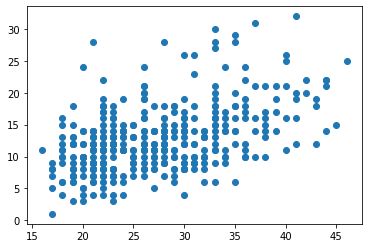

In [16]:
fig, ax = plt.subplots()
ax.scatter(x, y)
plt.show()

In [17]:
x1 = final_data.loc[:,"Father_age"]
y1 = final_data.loc[:,"pat_dnm"]

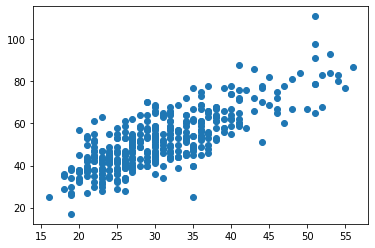

In [18]:
fig, ax = plt.subplots()
ax.scatter(x1, y1)
plt.show()
#x - age

In [19]:
mat_dnm_v_age2 = smf.ols(formula = "mat_dnm ~ Mother_age", data = final_data)
mat_dnm_v_age = mat_dnm_v_age2.fit()
mat_dnm_v_age.summary()
#mat age plays a role in # of mutations = SIGNIFICANT ASSOCIATION != causation

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                mat_dnm   R-squared:                       0.228
Model:                            OLS   Adj. R-squared:                  0.226
Method:                 Least Squares   F-statistic:                     116.0
Date:                Fri, 03 Sep 2021   Prob (F-statistic):           6.88e-24
Time:                        09:17:09   Log-Likelihood:                -1158.1
No. Observations:                 396   AIC:                             2320.
Df Residuals:                     394   BIC:                             2328.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.5040      0.981      2.553      0.011       0.576       4.432
Mother_age     0.3776      0.035     10.772      0.000       0.309       0.446
==============================================================================
Omnibus:                       51.143   Durbin-Watson:                   2.090
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               75.501
Skew:                           0.845   Prob(JB):                     4.03e-17
Kurtosis:                       4.310   Cond. No.                         121.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [36]:
pat_dnm_v_age2 = smf.ols(formula = "pat_dnm ~ Father_age", data = final_data)
pat_dnm_v_age = pat_dnm_v_age2.fit()
pat_dnm_v_age.summary()
#paternal age association stronger; can't totally rely on p value because n could be different
#to look at which association is stronger, confidence interval around [0.025], compare to moms,
#shouldn't be overlapping. no overlap = significant association
#could add interaction term and test both association 

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                pat_dnm   R-squared:                       0.619
Model:                            OLS   Adj. R-squared:                  0.618
Method:                 Least Squares   F-statistic:                     639.6
Date:                Fri, 03 Sep 2021   Prob (F-statistic):           1.55e-84
Time:                        09:20:57   Log-Likelihood:                -1406.6
No. Observations:                 396   AIC:                             2817.
Df Residuals:                     394   BIC:                             2825.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     10.3263      1.702      6.066      0.000       6.979      13.673
Father_age     1.3538      0.054     25.291      0.000       1.249       1.459
==============================================================================
Omnibus:                        7.687   Durbin-Watson:                   1.795
Prob(Omnibus):                  0.021   Jarque-Bera (JB):                8.185
Skew:                           0.256   Prob(JB):                       0.0167
Kurtosis:                       3.483   Cond. No.                         127.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

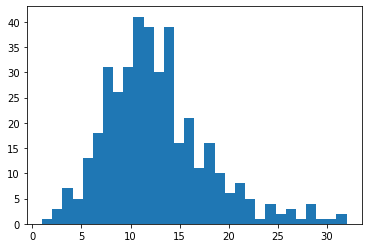

In [21]:
fig, ax = plt.subplots()
ax.hist(final_data.loc[:, "mat_dnm"], bins = 30)
plt.show()

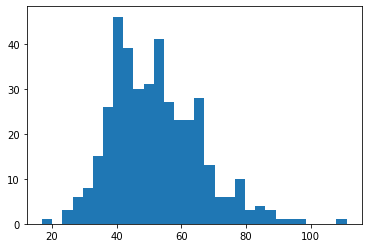

In [22]:
fig, ax = plt.subplots()
ax.hist(final_data.loc[:, "pat_dnm"], bins = 30)
plt.show()

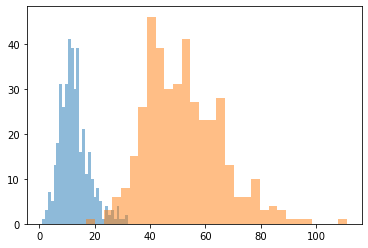

In [23]:
fig, ax = plt.subplots()
ax.hist(final_data.loc[:, "mat_dnm"], bins = 30, alpha = 0.5)
ax.hist(final_data.loc[:, "pat_dnm"], bins = 30, alpha = 0.5)
plt.show()

In [24]:
mat_dnm_v_pat_dnm2 = smf.ols(formula = "mat_dnm ~ pat_dnm", data = final_data)
mat_dnm_v_pat_dnm = mat_dnm_v_pat_dnm2.fit()
mat_dnm_v_pat_dnm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                mat_dnm   R-squared:                       0.143
Model:                            OLS   Adj. R-squared:                  0.141
Method:                 Least Squares   F-statistic:                     65.71
Date:                Fri, 03 Sep 2021   Prob (F-statistic):           6.66e-15
Time:                        09:17:09   Log-Likelihood:                -1178.7
No. Observations:                 396   AIC:                             2361.
Df Residuals:                     394   BIC:                             2369.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      5.4039      0.941      5.743      0.000       3.554       7.254
pat_dnm        0.1418      0.017      8.106      0.000       0.107       0.176
==============================================================================
Omnibus:                       42.748   Durbin-Watson:                   2.057
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               56.621
Skew:                           0.785   Prob(JB):                     5.07e-13
Kurtosis:                       3.983   Cond. No.                         212.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [25]:
pois_mat_dnm_v_age2 = smf.poisson(formula = "mat_dnm ~ Mother_age", data = final_data)
pois_mat_dnm_v_age = pois_mat_dnm_v_age2.fit()
pois_mat_dnm_v_age.summary()

Optimization terminated successfully.
         Current function value: 2.927974
         Iterations 5


<class 'statsmodels.iolib.summary.Summary'>
"""
                          Poisson Regression Results                          
==============================================================================
Dep. Variable:                mat_dnm   No. Observations:                  396
Model:                        Poisson   Df Residuals:                      394
Method:                           MLE   Df Model:                            1
Date:                Fri, 03 Sep 2021   Pseudo R-squ.:                 0.07164
Time:                        09:17:09   Log-Likelihood:                -1159.5
converged:                       True   LL-Null:                       -1248.9
Covariance Type:            nonrobust   LLR p-value:                 8.241e-41
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.7671      0.060     29.235      0.000       1.649       1.886
Mother_age     0.0281      0.002     13.582      0.000       0.024       0.032
==============================================================================
"""

In [26]:
pois_pat_dnm_v_age2 = smf.poisson(formula = "pat_dnm ~ Father_age", data = final_data)
pois_pat_dnm_v_age = pois_pat_dnm_v_age2.fit()
pois_pat_dnm_v_age.summary()

Optimization terminated successfully.
         Current function value: 3.578620
         Iterations 5


<class 'statsmodels.iolib.summary.Summary'>
"""
                          Poisson Regression Results                          
==============================================================================
Dep. Variable:                pat_dnm   No. Observations:                  396
Model:                        Poisson   Df Residuals:                      394
Method:                           MLE   Df Model:                            1
Date:                Fri, 03 Sep 2021   Pseudo R-squ.:                  0.2277
Time:                        09:17:09   Log-Likelihood:                -1417.1
converged:                       True   LL-Null:                       -1834.9
Covariance Type:            nonrobust   LLR p-value:                1.004e-183
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      3.1903      0.027    116.856      0.000       3.137       3.244
Father_age     0.0241      0.001     29.608      0.000       0.023       0.026
==============================================================================
"""

In [38]:
pois_mat_dnm_v_pat_dnm2 = smf.poisson(formula = "mat_dnm ~ pat_dnm", data = final_data)
pois_mat_dnm_v_pat_dnm = pois_mat_dnm_v_pat_dnm2.fit()
pois_mat_dnm_v_pat_dnm.summary()

Optimization terminated successfully.
         Current function value: 3.011762
         Iterations 4


<class 'statsmodels.iolib.summary.Summary'>
"""
                          Poisson Regression Results                          
==============================================================================
Dep. Variable:                mat_dnm   No. Observations:                  396
Model:                        Poisson   Df Residuals:                      394
Method:                           MLE   Df Model:                            1
Date:                Fri, 03 Sep 2021   Pseudo R-squ.:                 0.04507
Time:                        09:23:45   Log-Likelihood:                -1192.7
converged:                       True   LL-Null:                       -1248.9
Covariance Type:            nonrobust   LLR p-value:                 2.662e-26
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.9885      0.055     36.355      0.000       1.881       2.096
pat_dnm        0.0105      0.001     10.793      0.000       0.009       0.012
==============================================================================
"""

In [28]:
pois_pat_dnm_v_age.params 

Intercept     3.190257
Father_age    0.024096
dtype: float64

In [29]:
pois_pat_dnm_v_age.params 

Intercept     3.190257
Father_age    0.024096
dtype: float64

In [30]:
pois_pat_dnm_v_age.params[0] + (pois_pat_dnm_v_age.params[1] * 50.5) 

4.4071010737821865

In [41]:
import numpy as np
np.exp(4.4071010737821865)   #add intercept? no, intercept inside exponent

82.03131575268247

In [31]:
pat_dnm_v_age.params[0] + (pat_dnm_v_age.params[1] * 50.5)

78.695456752117

In [39]:
#need to rescale coefficients for poisson 